# Exploratory Data Analysis

## Problem Statement

This is the HR datasets. In our dataset 50000 rows and 14 columns. Every year, around 5% of its employees have promoted in the company. so, we have the check employee is promoted or not?

### Columns Name
- employee_id
- department
- region
- education
- gender
- recruitment_channel
- nooftrainings
- age 
- previousyearrating
- lengthofservice
- KPIs_met >80%
- awards_won?
- avgtrainingscore
- is_promoted

In [2]:
# import the libraries needed to use during the analysis

#libraries for the data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# libraries for the study of the models
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score,RocCurveDisplay




## Preparing the datset

In [78]:

# import the dataset
hr_dataset = pd.read_csv('hr_dataset.csv', delimiter = ',')

# quick overview of the dataset
hr_dataset.head(n=15)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [76]:
hr_dataset.info()
print("Shape of the dataset: ", hr_dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
Shape of the 

In [4]:
# check if there are null values
hr_dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
# check the values from the column of type 'Object' so that they are unique and valid
for column in hr_dataset.columns:
    if hr_dataset[column].dtype == 'object':
        print(column, ": ", hr_dataset[column].unique())

department :  ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region :  ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education :  ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender :  ['f' 'm']
recruitment_channel :  ['sourcing' 'other' 'referred']


In [6]:
# As the dataset we are using is large, we can get rid of the null values without any significant impact on the result
hr_dataset.dropna(inplace=True)

In [7]:
#comprobamos que se han eliminado correctamente
hr_dataset.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [8]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  KPIs_met >80%         48660 non-null  int64  
 11  awards_won?           48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [9]:
# check duplicates on employee_id 
hr_dataset['employee_id'].duplicated().sum()

0

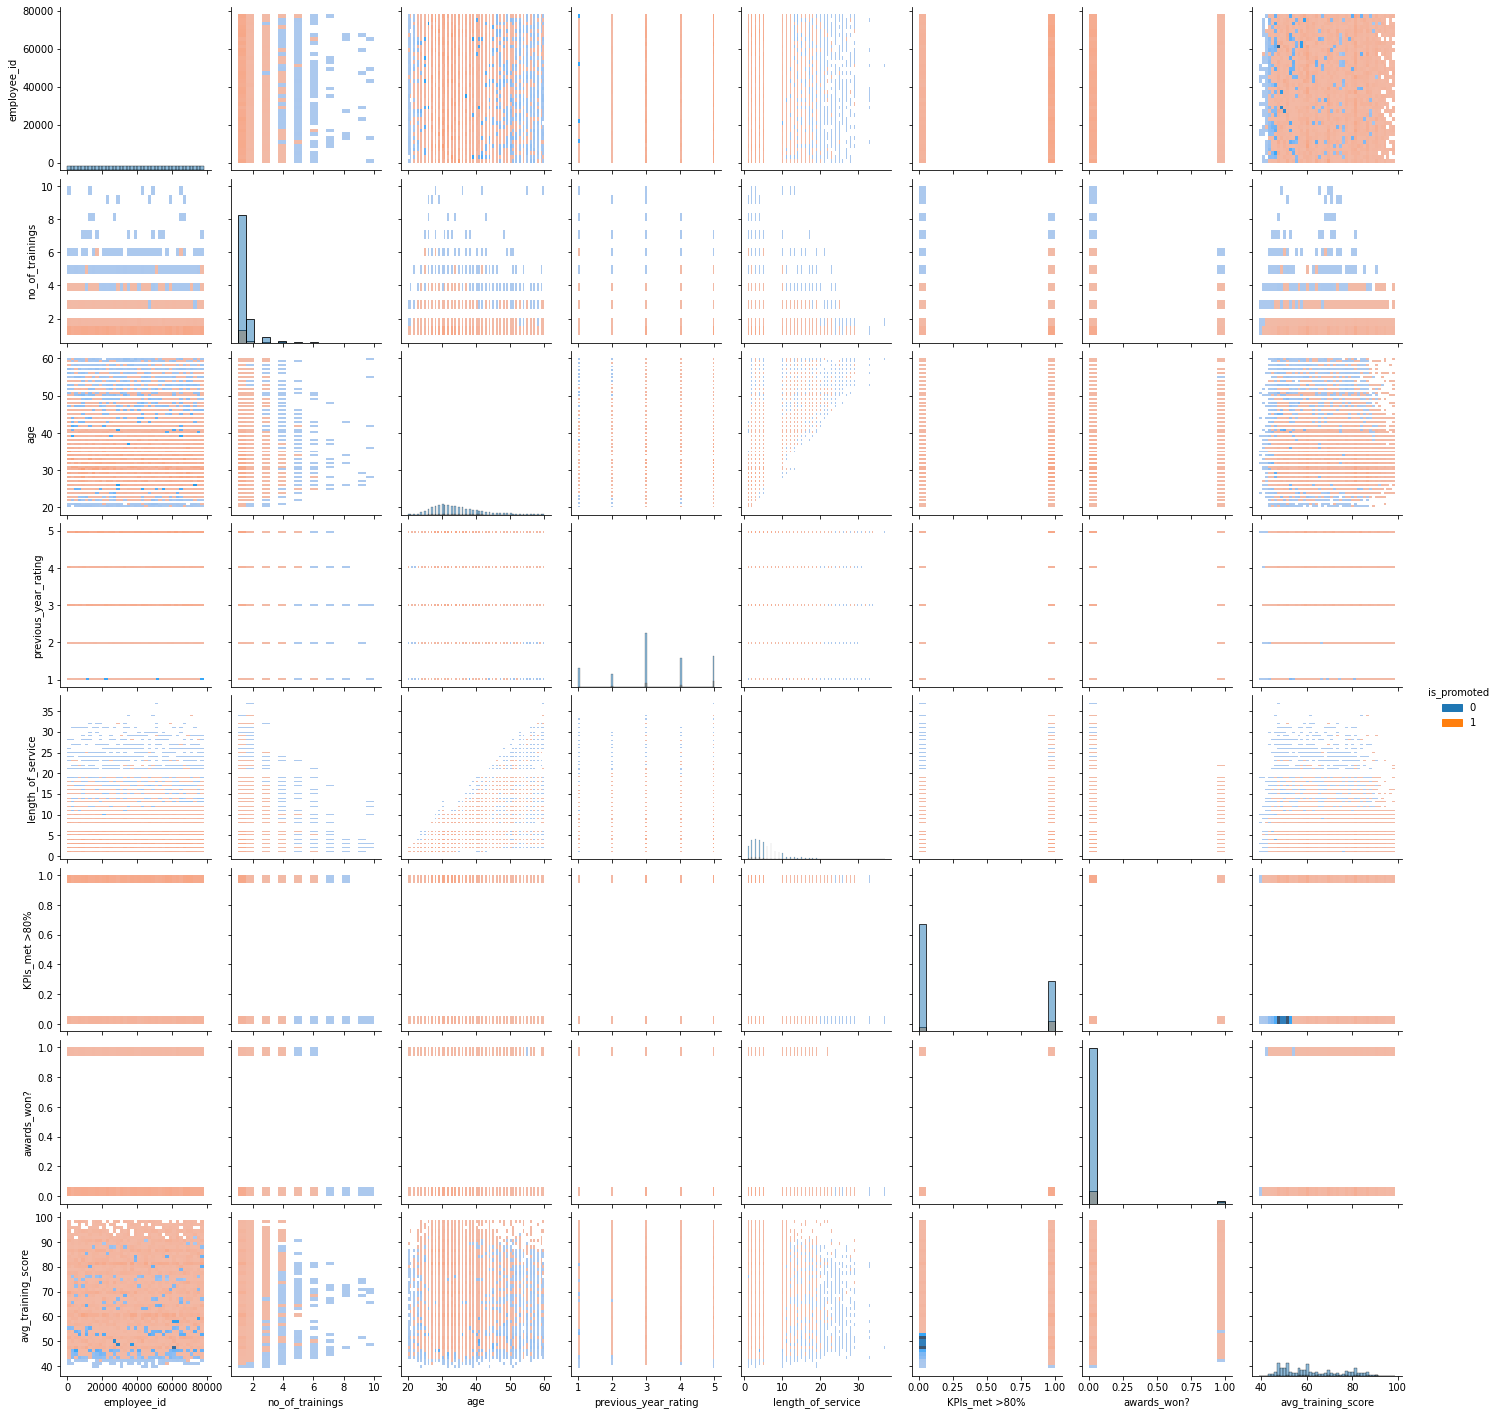

In [81]:
# Plotting graphs to get an overview of the variables
sns.pairplot(hr_dataset, hue="is_promoted", kind="hist")
plt.show()

<AxesSubplot:>

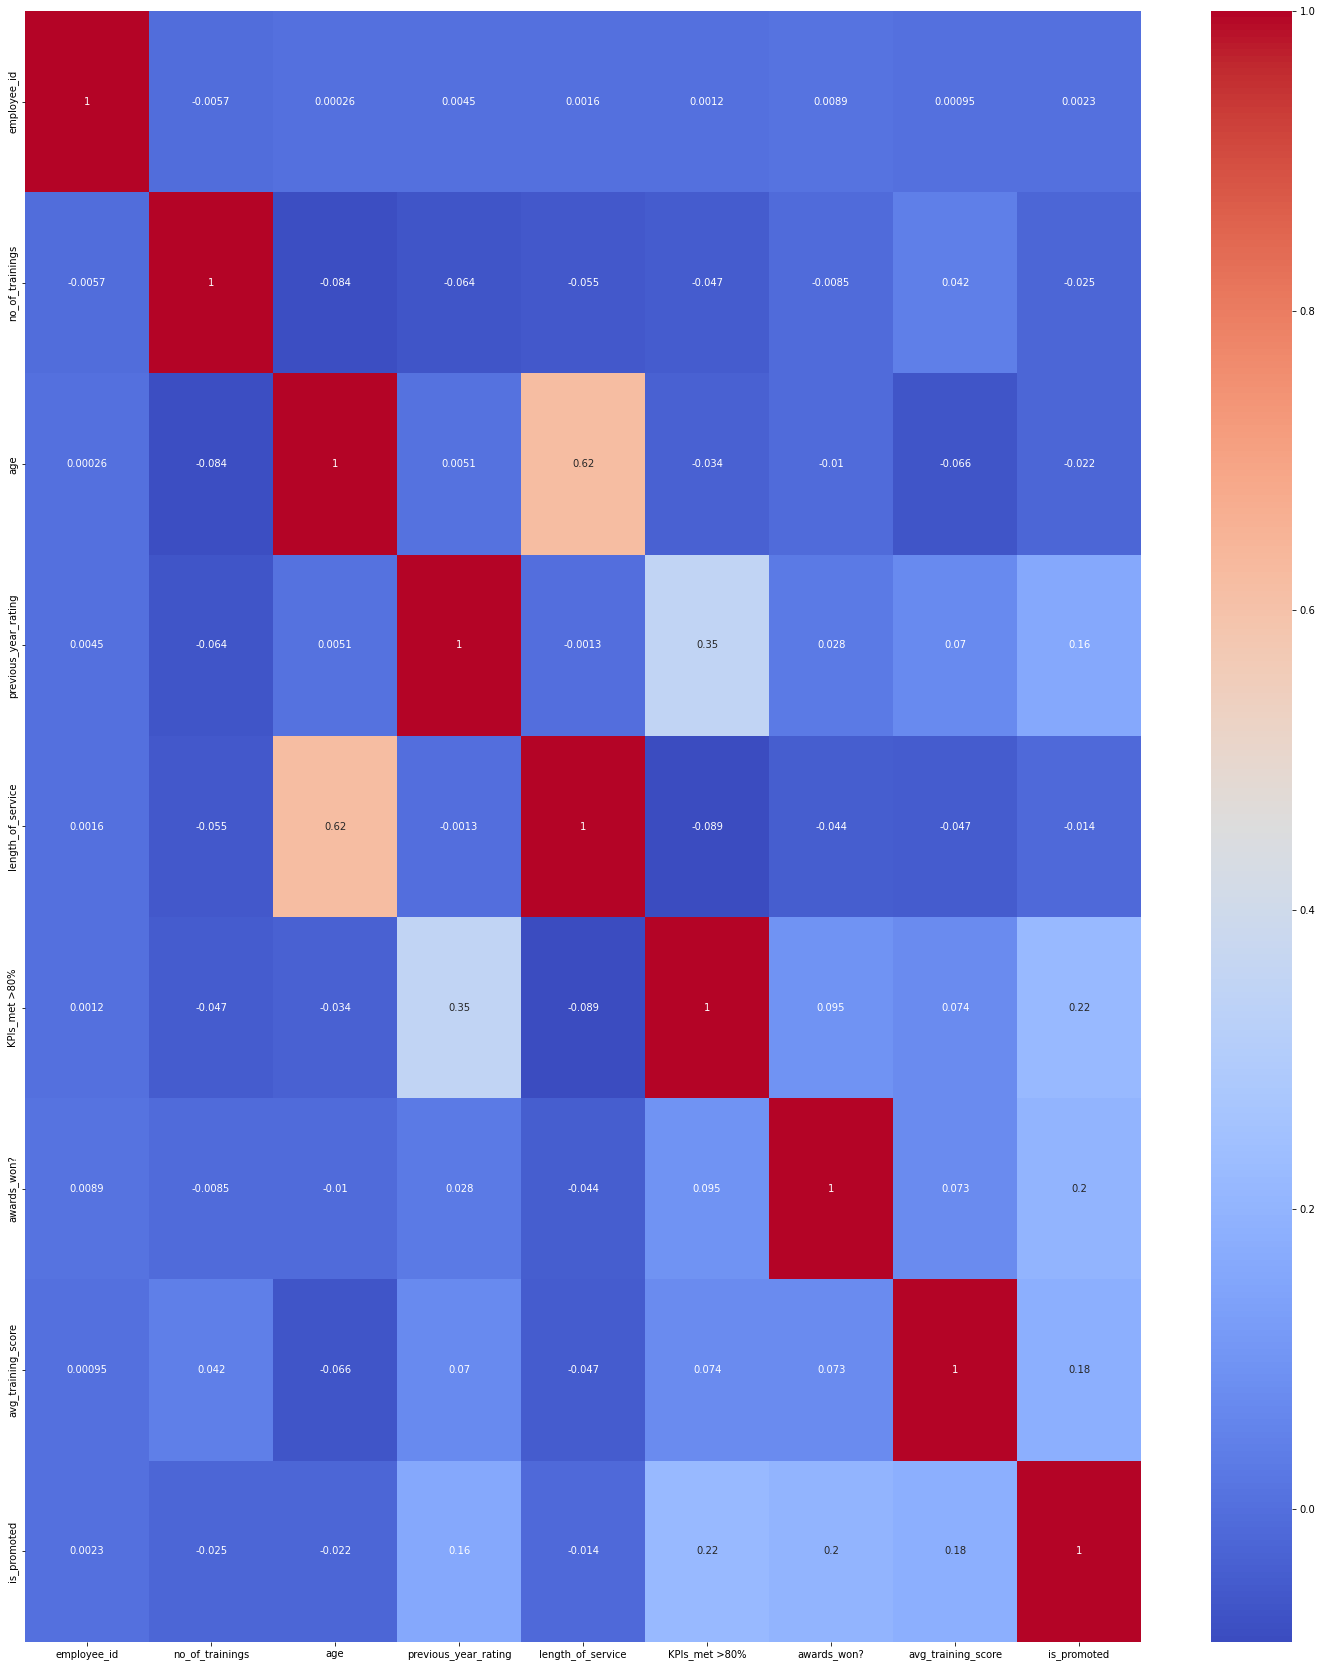

In [11]:
# Analyzing correlation between feaures
plt.figure(figsize=(25,30))
sns.heatmap(hr_dataset.corr(),annot=True, cmap='coolwarm')

In [12]:
##Pearsons's correlation coefficients shows us is there linear correlation between variables or not. 
#And the assumption about age and length_of_service correlation is confirmed
#All the other features are not correlated and that is good

array([[<AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'KPIs_met >80%'}>],
       [<AxesSubplot:title={'center':'awards_won?'}>,
        <AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>]], dtype=object)

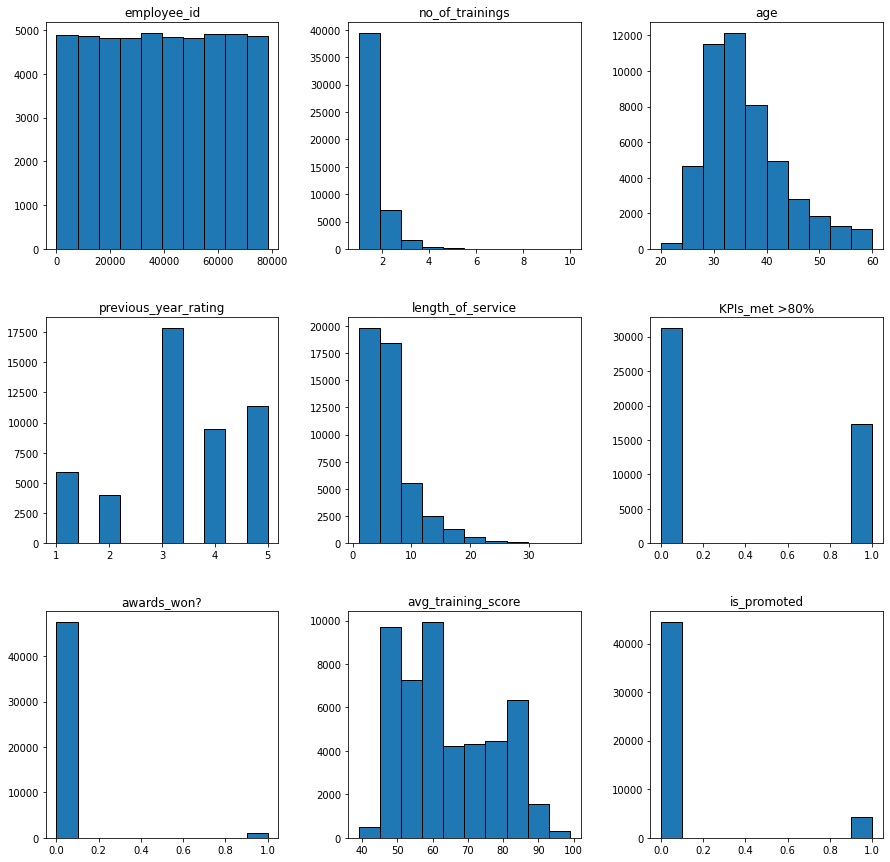

In [13]:
# Plotting the continuous variables

hr_dataset.hist(edgecolor='black', linewidth=1, figsize=(15,15), grid=False)

Text(0.5, 1.0, 'age')

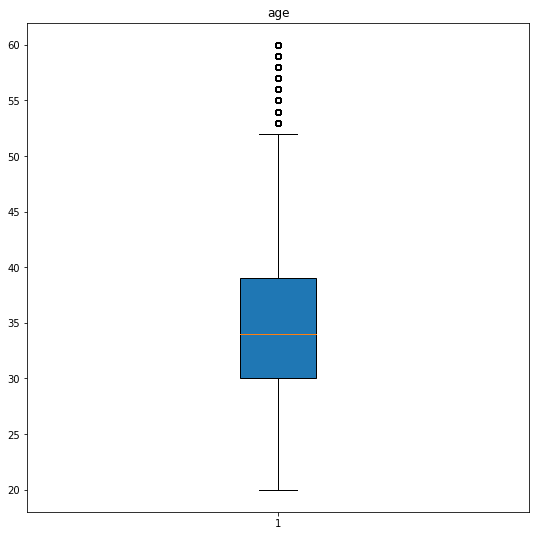

In [65]:
# Making a boxplot of some of the variables to visualize the overlays
plt.boxplot(hr_dataset['age'], patch_artist = True)
plt.title('age')

Text(0.5, 1.0, 'length_of_service')

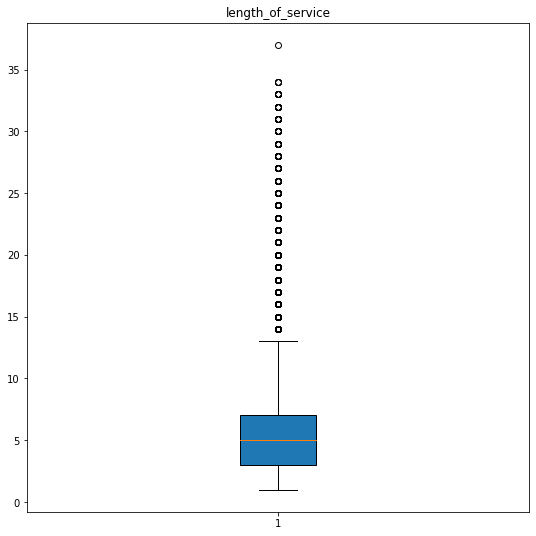

In [106]:
plt.boxplot(hr_dataset['length_of_service'], patch_artist = True)
plt.title('length_of_service')

Text(0.5, 1.0, 'avg_training_score')

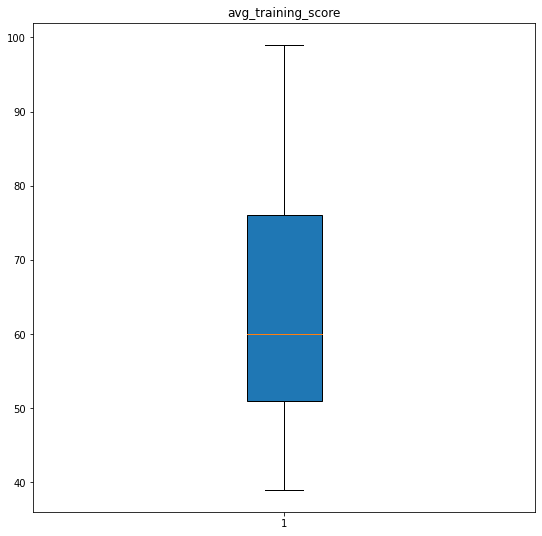

In [111]:
plt.boxplot(hr_dataset['avg_training_score'], patch_artist = True)
plt.title('avg_training_score')

Text(0.5, 1.0, 'Department')

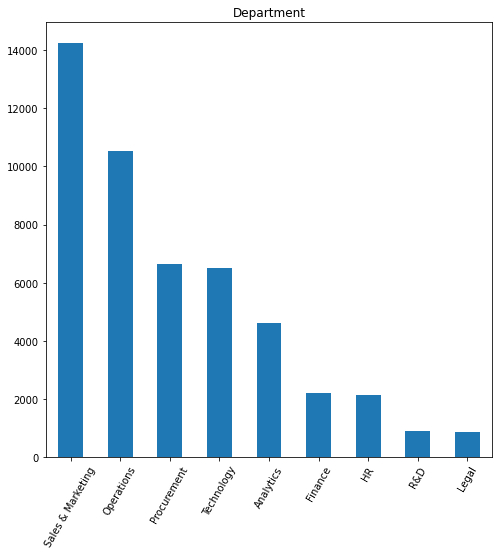

In [68]:
# Plotting the categorical variables:
## department
hr_dataset['department'].value_counts().plot.bar(rot=60,figsize=(8,8))
plt.title('Department')


Text(0.5, 1.0, 'Region')

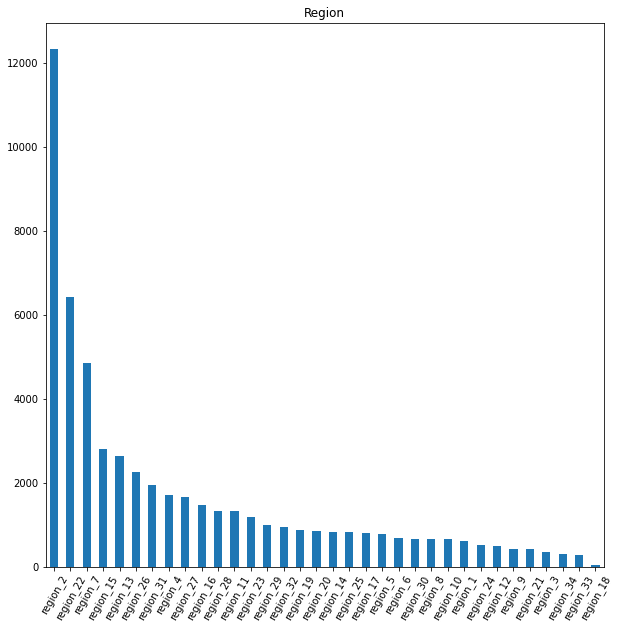

In [113]:
## region
hr_dataset['region'].value_counts().plot.bar(rot=60,figsize=(10,10))
plt.title('Region')


Text(0.5, 1.0, 'Education')

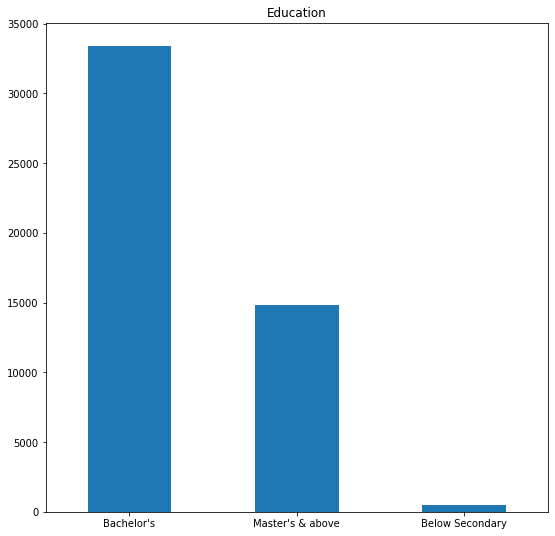

In [67]:
## education
hr_dataset['education'].value_counts().plot.bar(rot=0)
plt.title('Education')

Text(0.5, 1.0, 'Gender')

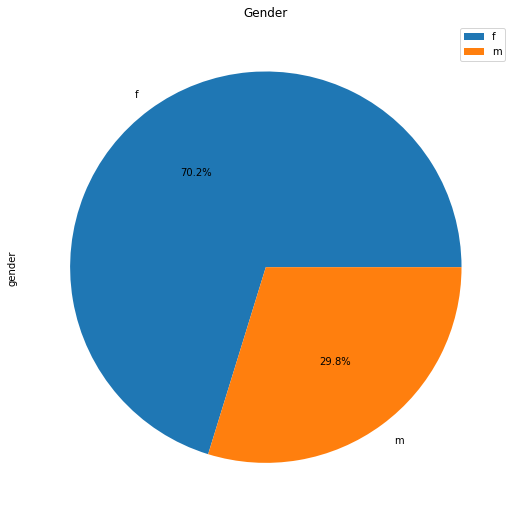

In [123]:
## gender

hr_dataset['gender'].value_counts().plot(kind="pie", labels=hr_dataset['gender'], legend=True, autopct='%.1f%%')
plt.title('Gender')


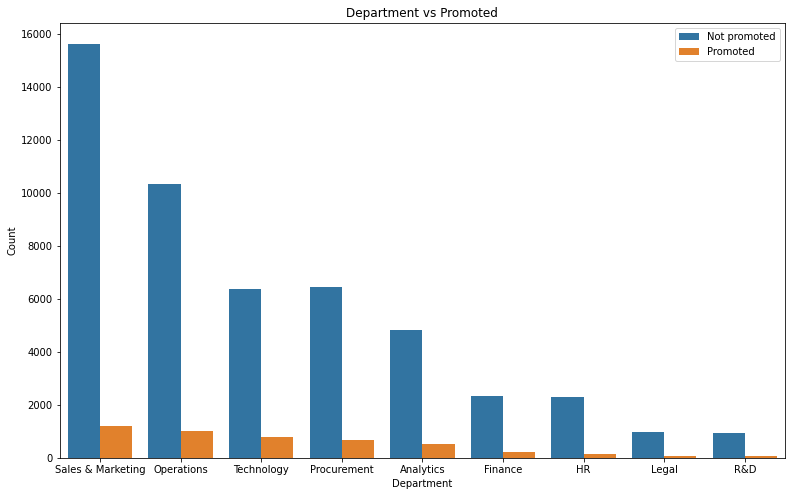

In [130]:
# Plotting each variable against the objective:
## department vs is promoted
plt.subplots(figsize=(13,8))
sns.countplot(x=hr_dataset['department'],hue=hr_dataset['is_promoted'], order = hr_dataset['department'].value_counts().index)
plt.title('Department vs Promoted')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])

## According to the plot, the most likely to be promoted are in the Sales&Marketing department

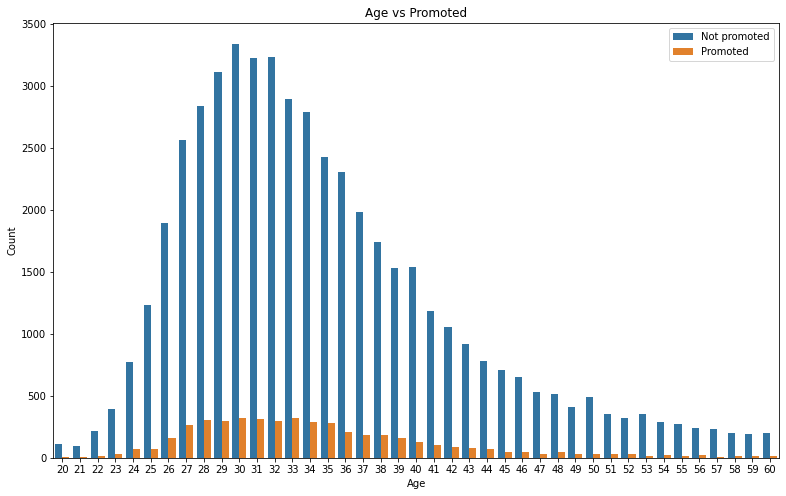

In [150]:
## age vs is promoted
plt.subplots(figsize=(13,8))
sns.countplot(x=hr_dataset['age'],hue=hr_dataset['is_promoted'])
plt.title('Age vs Promoted')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])


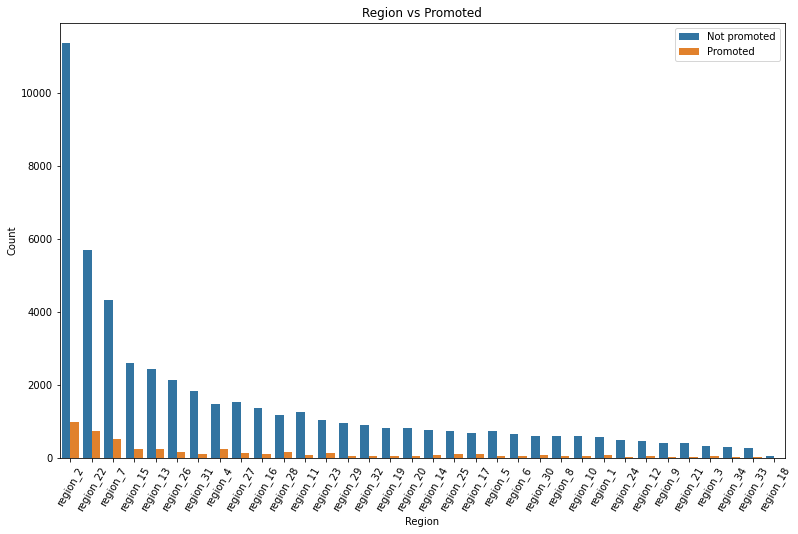

In [136]:
## region vs is promoted           
plt.subplots(figsize=(13,8))
sns.countplot(x=hr_dataset['region'],hue=hr_dataset['is_promoted'], order = hr_dataset['region'].value_counts().index)
plt.title('Region vs Promoted')
plt.xticks(rotation = 60)
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])



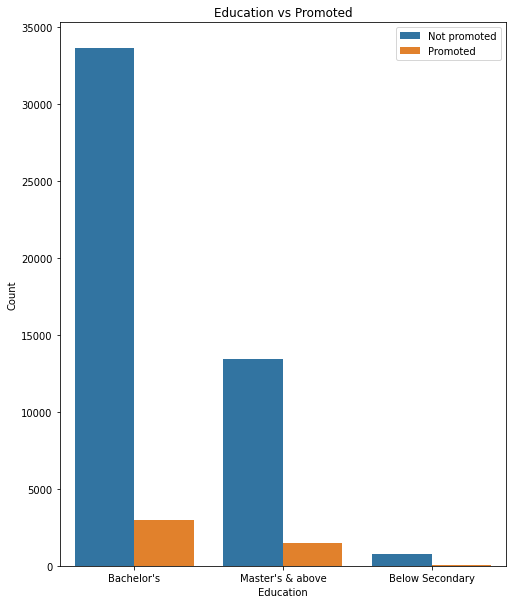

In [137]:
## education vs is promoted               
plt.subplots(figsize=(8,10))
sns.countplot(x=hr_dataset['education'],hue=hr_dataset['is_promoted'], order = hr_dataset['education'].value_counts().index)
plt.title('Education vs Promoted')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])



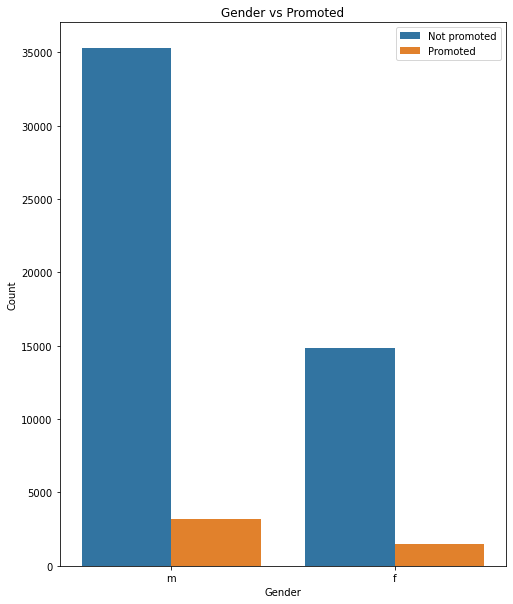

In [138]:
## gender vs is promoted                  
plt.subplots(figsize=(8,10))
sns.countplot(x=hr_dataset['gender'],hue=hr_dataset['is_promoted'], order = hr_dataset['gender'].value_counts().index)
plt.title('Gender vs Promoted')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])



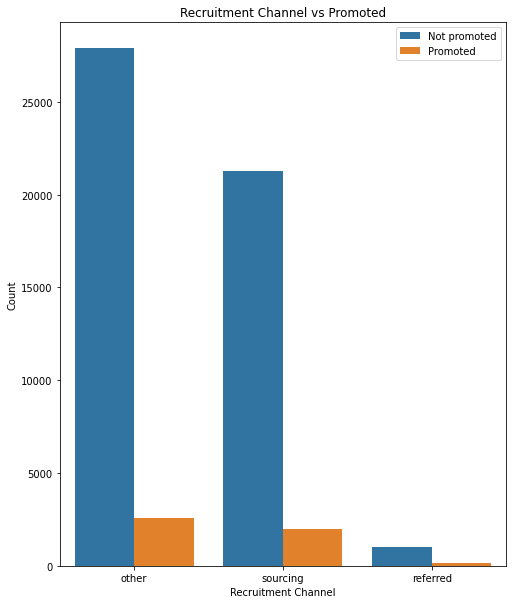

In [139]:
## recruitment_channel vs is promoted
plt.subplots(figsize=(8,10))
sns.countplot(x=hr_dataset['recruitment_channel'],hue=hr_dataset['is_promoted'], order = hr_dataset['recruitment_channel'].value_counts().index)
plt.title('Recruitment Channel vs Promoted')
plt.xlabel('Recruitment Channel')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])


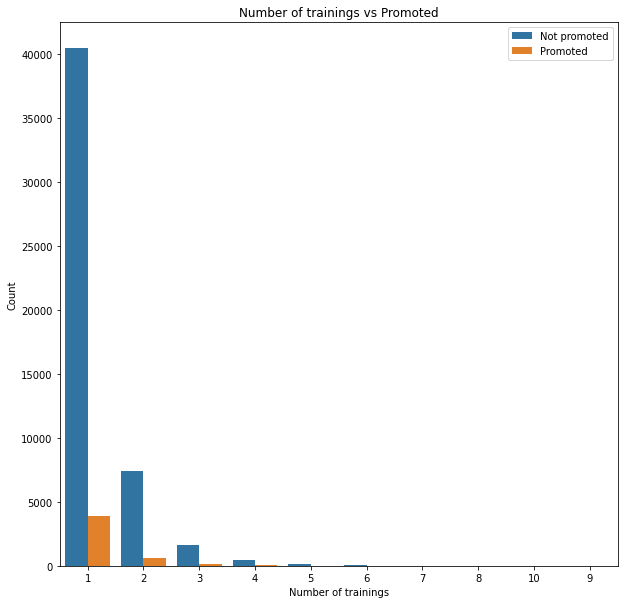

In [143]:
## no_of_trainings vs is promoted
plt.subplots(figsize=(10,10))
sns.countplot(x=hr_dataset['no_of_trainings'],hue=hr_dataset['is_promoted'], order = hr_dataset['no_of_trainings'].value_counts().index)
plt.title('Number of trainings vs Promoted')
plt.xlabel('Number of trainings')
plt.ylabel('Count')
plt.legend(loc='upper right',labels=['Not promoted', 'Promoted'])


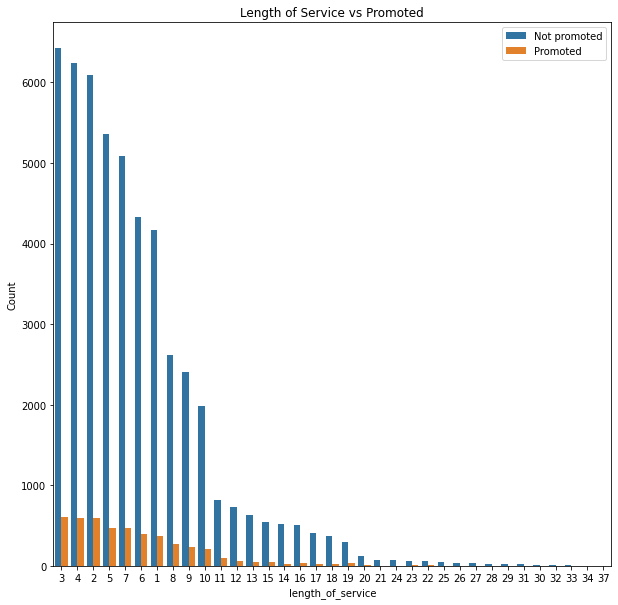

In [144]:
## length_of_service vs is promoted
plt.subplots(figsize=(10,10))
sns.countplot(x=hr_dataset['length_of_service'],hue=hr_dataset['is_promoted'] ,order = hr_dataset['length_of_service'].value_counts().index)
plt.title('Length of Service vs Promoted')
plt.ylabel('Count')
plt.legend(loc='upper right', labels=['Not promoted', 'Promoted'])

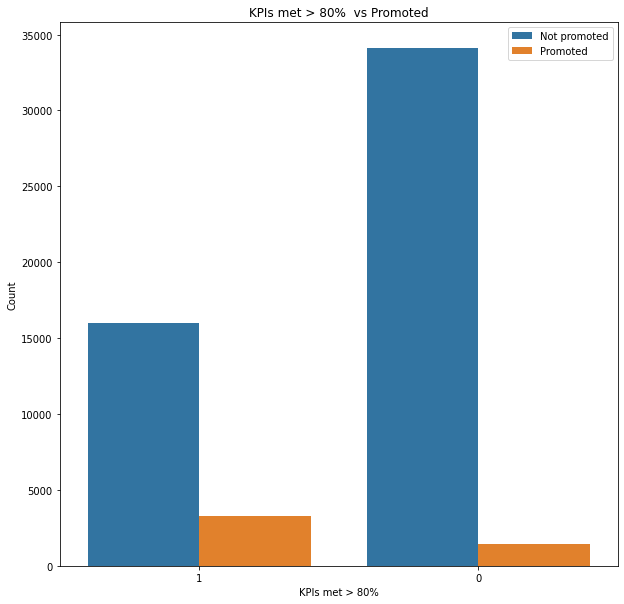

In [145]:
## KPIs_met >80% vs is promoted
plt.subplots(figsize=(10,10))
sns.countplot(x=hr_dataset['KPIs_met >80%'],hue=hr_dataset['is_promoted'], order = hr_dataset['KPIs_met >80%'].value_counts().sort_values().index)
plt.title('KPIs met > 80%  vs Promoted')
plt.xlabel('KPIs met > 80%')
plt.ylabel('Count')
plt.legend(loc='upper right', labels=['Not promoted', 'Promoted'])

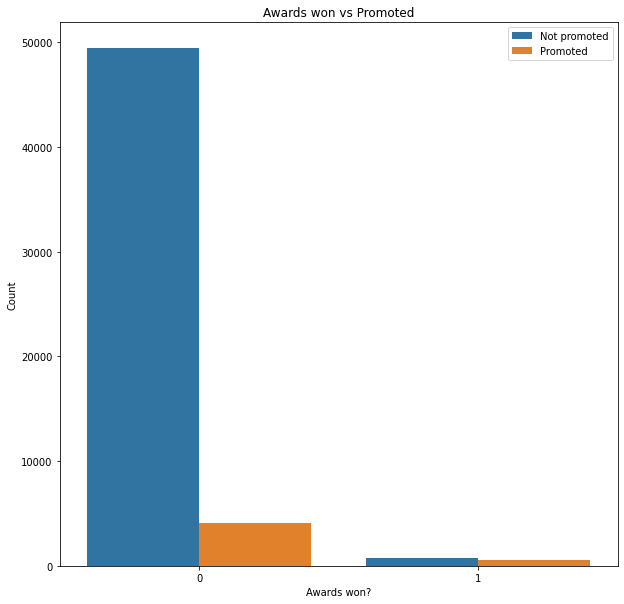

In [146]:
## awards_won? vs is promoted
plt.subplots(figsize=(10,10))
sns.countplot(x=hr_dataset['awards_won?'],hue=hr_dataset['is_promoted'], order = hr_dataset['awards_won?'].value_counts().index)
plt.title('Awards won vs Promoted')
plt.xlabel('Awards won?')
plt.ylabel('Count')
plt.legend(loc='upper right', labels=['Not promoted', 'Promoted'])

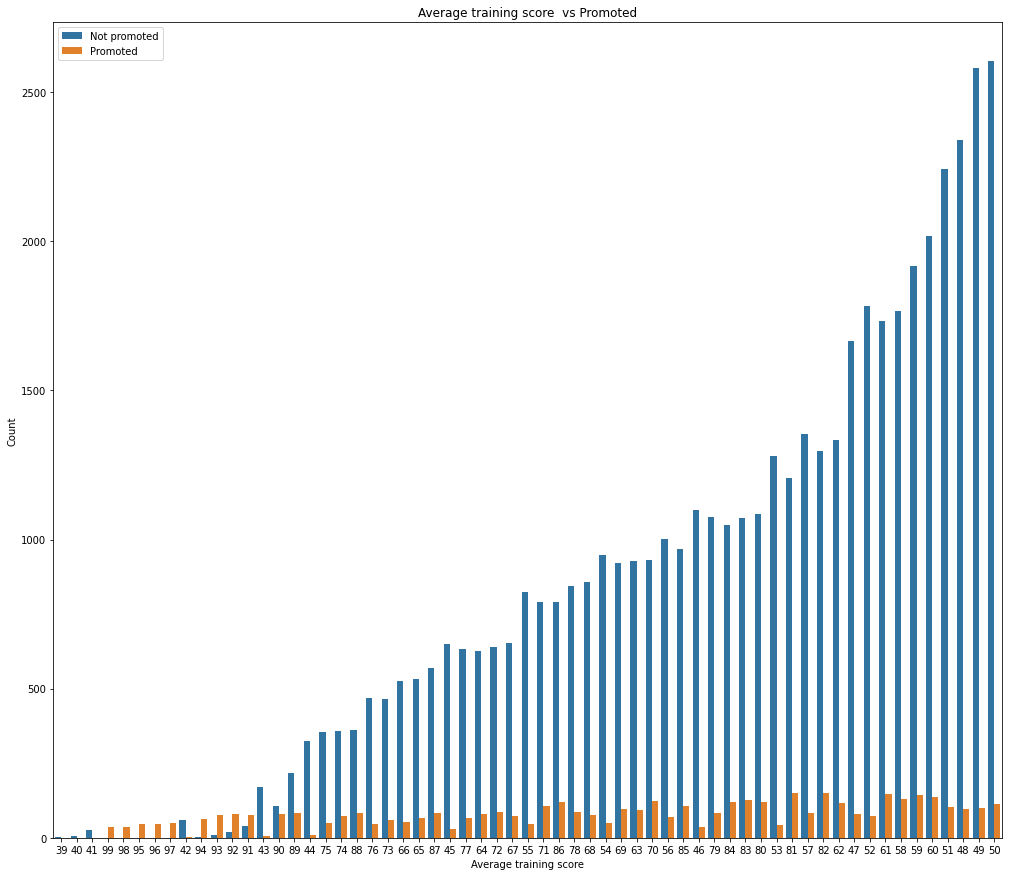

In [148]:
## avg_training_score vs is promoted

plt.subplots(figsize=(17,15))
sns.countplot(x=hr_dataset['avg_training_score'], hue=hr_dataset['is_promoted'], order = hr_dataset['avg_training_score'].value_counts().sort_values().index)
plt.title('Average training score  vs Promoted')
plt.xlabel('Average training score')
plt.ylabel('Count')
plt.legend(loc='upper left', labels=['Not promoted', 'Promoted'])

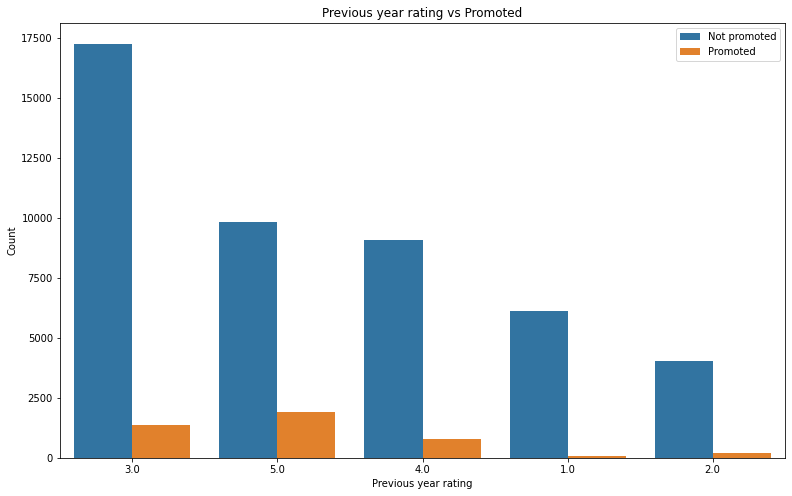

In [152]:
## previous_year_rating vs is promoted
plt.subplots(figsize=(13,8))
sns.countplot(x=hr_dataset['previous_year_rating'],hue=hr_dataset['is_promoted'], order = hr_dataset['previous_year_rating'].value_counts().index)
plt.title('Previous year rating vs Promoted')
plt.xlabel('Previous year rating')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])

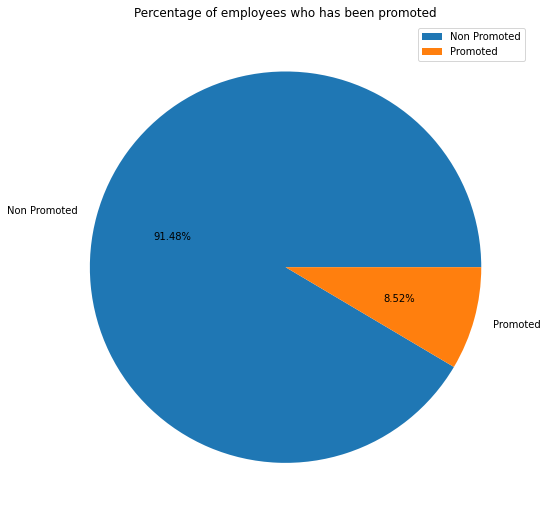

In [220]:
# Promoted employees vs non promoted
promoted=[]
non_promoted=[]

for i in hr_dataset['is_promoted']:
    if i==0:
        promoted.append(i)
    else:
        non_promoted.append(i)

promoted_arr=np.array(promoted)
non_promoted_arr=np.array(non_promoted)

size_promoted=promoted_arr.size
size_non_promoted=non_promoted_arr.size

size = (size_promoted,size_non_promoted)
labels = "Non Promoted", "Promoted"

fig = plt.figure()

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, labels = labels, autopct = '%.2f%%')
fig.set_facecolor('white')
plt.title('Percentage of employees who has been promoted') #, fontsize = 20)

plt.legend()
plt.show()


## Processing data

In [30]:

# Target Variable
y = hr_dataset['is_promoted']

# Independant Variable
X =  hr_dataset.drop('is_promoted', axis=1)

# MAke train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('Size x_train: ', x_train.shape)
print('Size y_train: ', y_train.shape)
print('Size x_test: ', x_test.shape)
print('Size y_test: ', y_test.shape)

size x_train:  (34062, 13)
size y_train:  (34062,)
size x_test:  (14598, 13)
size y_test:  (14598,)


In [31]:
# we get rid of the employee_id column, in both test and train set, as it is not a significant column

emp_id_train = x_train['employee_id']
x_train = x_train.drop('employee_id', axis=1)

emp_id_test = x_test['employee_id']
x_test = x_test.drop('employee_id', axis=1)

In [32]:
# we need to create dummy variables for the categorical variables, as they can only have two different possibilities 

x_train_transformed = pd.get_dummies(x_train)
x_test_transformed = pd.get_dummies(x_test)

print('Columns x_train: ', x_train_transformed.columns)
print('Columns x_test: ', x_test_transformed.columns)

Columns x_train:  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'regio

## Analysis of models

## Logistic regression

In [34]:
# Logistic Regression:

# Create the classifier. We need to increment the number of iterations
logistic_classifier = LogisticRegression(max_iter=2000)

# Adjust the classifier
logistic_classifier.fit(x_train_transformed, y_train.values.ravel())

# Predict the values
y_train_pred_l = logistic_classifier.predict(x_train_transformed)
y_test_pred_l = logistic_classifier.predict(x_test_transformed)

In [172]:
# Analyze the results

# First of all, create the confusion matrix for train set:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred_l).ravel()
print ('Confusion matrix for train set: ')
print("TP: ", tp)
print("FP: ", fp)
print("TN: ", tn)
print("FN: ", fn)
confusion_matrix_train_l = np.array([[tp,fp],[fn,tn]])
print(confusion_matrix_train_l)

# Standarize the confusion matrix to show the percentages of each value
confusion_matrix_train_normalizada_l = confusion_matrix_train_l/len(y_train)
print ('Normalized confusion matrix for train set: ')
print (confusion_matrix_train_normalizada_l)

# Deploy confusion matrix for test set:
print ('\nConfusion matrix for test set:  ')
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred_l).ravel()
print("TP: ", tp_test)
print("FP: ", fp_test)
print("TN: ", tn_test)
print("FN: ", fn_test)
confusion_matrix_test_l = np.array([[tp_test,fp_test],[fn_test,tn_test]])
print(confusion_matrix_test_l)

# Standarize the confusion matrix to show the percentages of each value
confusion_matrix_test_normalizada_l = confusion_matrix_test_l/len(y_test)
print ('Normalized confusion matrix for test set: ')
print (confusion_matrix_test_normalizada_l)


La matriz de confusion para entrenamiento es: 
TP:  751
FP:  181
TN:  30910
FN:  2220
[[  751   181]
 [ 2220 30910]]
La matriz de confusion para entrenamiento NORMALIZADA es: 
[[0.02204803 0.00531384]
 [0.06517527 0.90746286]]
La matriz de confusion para test es: 
TP:  339
FP:  68
TN:  13269
FN:  922
[[  339    68]
 [  922 13269]]
La matriz de confusion para test NORMALIZADA es: 
[[0.02322236 0.00465817]
 [0.06315934 0.90896013]]


In [177]:
# Check for over-adjustment

# Train set
accuray_score_train_l = accuracy_score(y_train, y_train_pred_l)
precision_score_train_l = precision_score(y_train, y_train_pred_l)
recall_score_train_l = recall_score(y_train, y_train_pred_l)

print ("Results for train set: ")
print('Accuracy: ', accuray_score_train_l)
print('Precision: ', precision_score_train_l)
print('Recall: ', recall_score_train_l)


print(classification_report(y_train,y_train_pred_l))

# test set
accuray_score_test_l = accuracy_score(y_test, y_test_pred_l)
precision_score_test_l = precision_score(y_test, y_test_pred_l)
recall_score_test_l = recall_score(y_test, y_test_pred_l)

print ("\nResults for test set: ")
print('Accuracy: ', accuray_score_test_l)
print('Precision: ', precision_score_test_l)
print('Recall: ', recall_score_test_l)
print(classification_report(y_test,y_test_pred_l))


Resultados conjunto de entrenamiento: 
Accuracy:  0.9295108919030004
Precision:  0.805793991416309
Recall:  0.25277684281386736
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     31091
           1       0.81      0.25      0.38      2971

    accuracy                           0.93     34062
   macro avg       0.87      0.62      0.67     34062
weighted avg       0.92      0.93      0.91     34062


Resultados conjunto de test: 
Accuracy:  0.9321824907521579
Precision:  0.8329238329238329
Recall:  0.26883425852498016
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13337
           1       0.83      0.27      0.41      1261

    accuracy                           0.93     14598
   macro avg       0.88      0.63      0.69     14598
weighted avg       0.93      0.93      0.92     14598



AUC:  0.6318678303196993
False positive rate:  [0.        0.0050986 1.       ]
Recall:  [0.         0.26883426 1.        ]
[2 1 0]
0.5


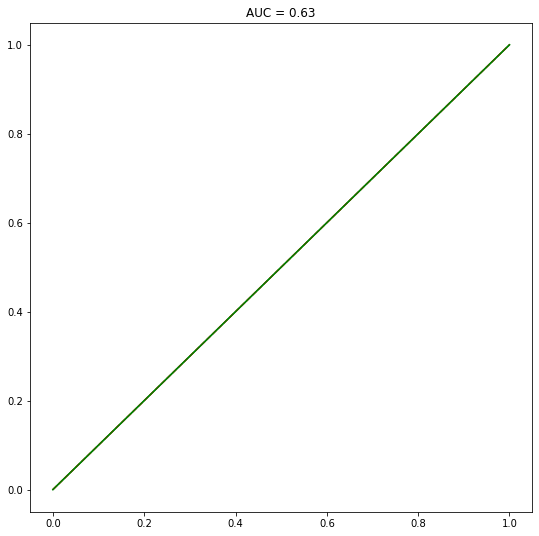

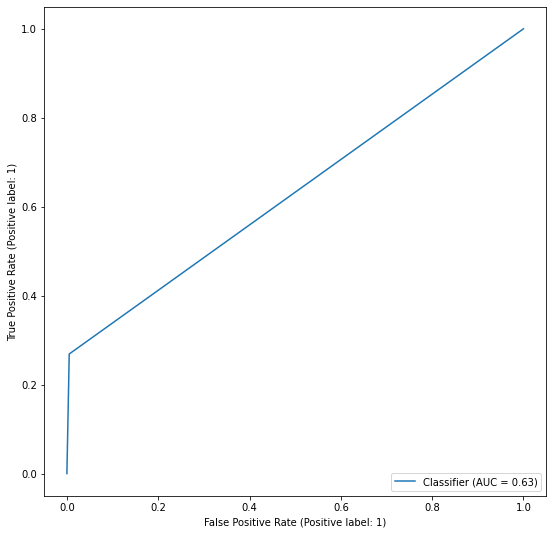

In [219]:
# Roc curve and AUC with test set:

false_positive_rate_l, recall_l, thresholds_l = roc_curve(y_test, y_test_pred_l, pos_label=1)
roc_auc_l = auc(false_positive_rate_l, recall_l)
print("AUC: ", roc_auc_l)
print("False positive rate: ", false_positive_rate_l)
print("Recall: ", recall_l)
print(thresholds_l)

a=[0, 0.99, 1]
b=[0, 0.99, 1]
plt.plot(false_positive_rate_l, recall_l, 'b')
plt.plot(a, b, 'g')
plt.plot([0,1],[0,1],'r--')
plt.title('AUC = %0.2f' % roc_auc_l)
plt.plot(a, b, 'g')
roc_auc_l2 = auc(a, b)
print(roc_auc_l2)
RocCurveDisplay.from_predictions(y_test, y_test_pred_l, pos_label=None)


## Decision tree

In [200]:

# Clasificador arbol de decision:

# crear el clasificador, y aumentamos el numero de iteraciones
dt_classifier = DecisionTreeClassifier (max_depth=2,criterion='entropy', random_state=1)

# ajustar el modelo 
dt_classifier.fit(x_train_transformed, y_train)

# predecir los valores
y_train_pred_dt = dt_classifier.predict(x_train_transformed)
y_test_pred_dt = dt_classifier.predict(x_test_transformed)

In [41]:
results_dt =  pd.DataFrame(data=[y_train, y_train_pred_dt]).T

print(y_train.shape, y_train_pred_dt.shape, results_dt.shape)
results_dt

(34062,) (34062,) (34062, 2)


,is_promoted,Unnamed 0
39797,1.0,NaN
52345,0.0,NaN
41901,0.0,NaN
38232,0.0,NaN
11913,0.0,0.0
...,...,...
34133,0.0,NaN
17740,0.0,0.0
1407,0.0,0.0
45627,0.0,NaN


In [42]:
df_dt = pd.DataFrame({'y_train': y_train, 'y_pred': y_train_pred_dt, 'status': y_train == y_train_pred_dt})

#check the trues and false vales: i.e the good predections and the bad ones
df_dt['status'].value_counts()

True     31469
False     2593
Name: status, dtype: int64

In [201]:
#Analizamos los resultados obtenidos

#matriz de confusion train
tnt, fpt, fnt, tpt = confusion_matrix(y_train, y_train_pred_dt).ravel()
print ('La matriz de confusion para entrenamiento es: ')
print("TP: ", tpt)
print("FP: ", fpt)
print("TN: ", tnt)
print("FN: ", fnt)
confusion_matrix_train_dt = np.array([[tpt,fpt],[fnt,tnt]])
print(confusion_matrix_train_dt)

#normalizamos la matriz de confusión para que muestre los porcentajes de cada tipo de acierto y fallo
confusion_matrix_train_normalizada_dt = confusion_matrix_train_dt/len(y_train)
print ('La matriz de confusion para entrenamiento NORMALIZADA es: ')
print (confusion_matrix_train_normalizada_dt)

#matriz de confusion para test
print ('La matriz de confusion para test es: ')
tn_testt, fp_testt, fn_testt, tp_testt = confusion_matrix(y_test, y_test_pred_dt).ravel()
print("TP: ", tp_testt)
print("FP: ", fp_testt)
print("TN: ", tn_testt)
print("FN: ", fn_testt)
confusion_matrix_test_dt = np.array([[tp_testt,fp_testt],[fn_testt,tn_testt]])
print(confusion_matrix_test_dt)

#normalizamos la matriz de confusión para que muestre los porcentajes de cada tipo de acierto y fallo
confusion_matrix_test_normalizada_dt = confusion_matrix_test_dt/len(y_test)
print ('La matriz de confusion para test NORMALIZADA es: ')
print (confusion_matrix_test_normalizada_dt)


La matriz de confusion para entrenamiento es: 
TP:  230
FP:  37
TN:  31054
FN:  2741
[[  230    37]
 [ 2741 31054]]
La matriz de confusion para entrenamiento NORMALIZADA es: 
[[0.00675239 0.00108625]
 [0.08047091 0.91169045]]
La matriz de confusion para test es: 
TP:  114
FP:  16
TN:  13321
FN:  1147
[[  114    16]
 [ 1147 13321]]
La matriz de confusion para test NORMALIZADA es: 
[[0.00780929 0.00109604]
 [0.07857241 0.91252226]]


In [202]:
# comprobar si hay sobreajuste

# conjunto de entrenamiento
accuray_score_train_dt = accuracy_score(y_train, y_train_pred_dt)
precision_score_train_dt = precision_score(y_train, y_train_pred_dt)
recall_score_train_dt = recall_score(y_train, y_train_pred_dt)

print ("Resultados conjunto de entrenamiento: ")
print('Accuracy: ', accuray_score_train_dt)
print('Precision: ', precision_score_train_dt)
print('Recall: ', recall_score_train_dt)
print(classification_report(y_train,y_train_pred_dt))


# conjunto de test
accuray_score_test_dt = accuracy_score(y_test, y_test_pred_dt)
precision_score_test_dt = precision_score(y_test, y_test_pred_dt)
recall_score_test_dt = recall_score(y_test, y_test_pred_dt)

print ("\nResultados conjunto de entrenamiento: ")
print('Accuracy: ', accuray_score_test_dt)
print('Precision: ', precision_score_test_dt)
print('Recall: ', recall_score_test_dt)
print(classification_report(y_test,y_test_pred_dt))


Resultados conjunto de entrenamiento: 
Accuracy:  0.9184428395279197
Precision:  0.8614232209737828
Recall:  0.07741501178054527
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     31091
           1       0.86      0.08      0.14      2971

    accuracy                           0.92     34062
   macro avg       0.89      0.54      0.55     34062
weighted avg       0.91      0.92      0.89     34062


Resultados conjunto de entrenamiento: 
Accuracy:  0.9203315522674339
Precision:  0.8769230769230769
Recall:  0.09040444091990484
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13337
           1       0.88      0.09      0.16      1261

    accuracy                           0.92     14598
   macro avg       0.90      0.54      0.56     14598
weighted avg       0.92      0.92      0.89     14598



AUC:  0.5784716300558979
AUC:  0.5784716300558979


Text(0.5, 1.0, 'AUC = 0.58')

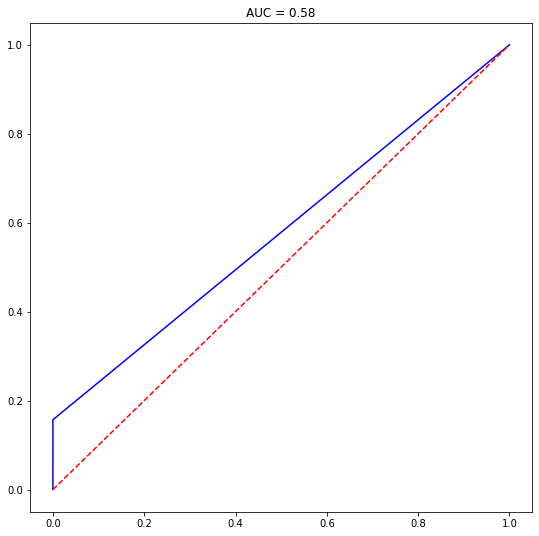

In [45]:
#Roc y AUC con los datos de test

false_positive_rate_dt, recall_dt, thresholds_dt = roc_curve(y_test, y_test_pred_dt)
roc_auc_dt = auc(false_positive_rate_dt, recall_dt)
print("AUC: ", roc_auc_dt)


print ('AUC: ', auc(false_positive_rate_dt, recall_dt))

plt.plot(false_positive_rate_dt, recall_dt, 'b')
plt.plot([0,1],[0,1],'r--')
plt.title('AUC = %0.2f' % roc_auc_dt)

## Random forest

In [46]:

# Clasificador random forest

# crear el clasificador
rf_classifier = RandomForestClassifier (criterion='entropy', n_estimators = 15, max_depth=8, random_state=1)

# ajustar el modelo 
rf_classifier.fit(x_train_transformed, y_train)

# predecir los valores
y_train_pred_rf = rf_classifier.predict(x_train_transformed)
y_test_pred_rf = rf_classifier.predict(x_test_transformed)


In [47]:
results_rf =  pd.DataFrame(data=[y_train, y_train_pred_rf]).T

print(y_train.shape, y_train_pred_rf.shape, results_rf.shape)
results_rf

(34062,) (34062,) (34062, 2)


,is_promoted,Unnamed 0
39797,1.0,NaN
52345,0.0,NaN
41901,0.0,NaN
38232,0.0,NaN
11913,0.0,0.0
...,...,...
34133,0.0,NaN
17740,0.0,0.0
1407,0.0,0.0
45627,0.0,NaN


In [48]:
df_rf = pd.DataFrame({'y_train': y_train, 'y_pred': y_train_pred_rf, 'status': y_train == y_train_pred_rf})

#check the trues and false vales: i.e the good predections and the bad ones
df_rf['status'].value_counts()

True     31322
False     2740
Name: status, dtype: int64

In [196]:
#Analizamos los resultados obtenidos

#matriz de confusion train
tnr, fpr, fnr, tpr = confusion_matrix(y_train, y_train_pred_rf).ravel()
print ('La matriz de confusion para entrenamiento es: ')
print("TP: ", tpr)
print("FP: ", fpr)
print("TN: ", tnr)
print("FN: ", fnr)
confusion_matrix_train_rf = np.array([[tpr,fpr],[fnr,tnr]])
print(confusion_matrix_train_rf)

#normalizamos la matriz de confusión para que muestre los porcentajes de cada tipo de acierto y fallo
confusion_matrix_train_normalizada_rf = confusion_matrix_train_rf/len(y_train)
print ('La matriz de confusion para entrenamiento NORMALIZADA es: ')
print (confusion_matrix_train_normalizada_rf)

#matriz de confusion para test
print ('La matriz de confusion para test es: ')
tn_testr, fp_testr, fn_testr, tp_testr = confusion_matrix(y_test, y_test_pred_rf).ravel()
print("TP: ", tp_testr)
print("FP: ", fp_testr)
print("TN: ", tn_testr)
print("FN: ", fn_testr)
confusion_matrix_test_rf = np.array([[tp_testr,fp_testr],[fn_testr,tn_testr]])
print(confusion_matrix_test_rf)

#normalizamos la matriz de confusión para que muestre los porcentajes de cada tipo de acierto y fallo
confusion_matrix_test_normalizada_rf = confusion_matrix_test_rf/len(y_test)
print ('La matriz de confusion para test NORMALIZADA es: ')
print (confusion_matrix_test_normalizada_rf)

La matriz de confusion para entrenamiento es: 
TP:  234
FP:  3
TN:  31088
FN:  2737
[[  234     3]
 [ 2737 31088]]
La matriz de confusion para entrenamiento NORMALIZADA es: 
[[6.86982561e-03 8.80746873e-05]
 [8.03534731e-02 9.12688627e-01]]
La matriz de confusion para test es: 
TP:  104
FP:  1
TN:  13336
FN:  1157
[[  104     1]
 [ 1157 13336]]
La matriz de confusion para test NORMALIZADA es: 
[[7.12426360e-03 6.85025346e-05]
 [7.92574325e-02 9.13549801e-01]]


In [197]:
# comprobar si hay sobreajuste

# conjunto de entrenamiento

accuray_score_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_score_train_rf = precision_score(y_train, y_train_pred_rf)
recall_score_train_rf = recall_score(y_train, y_train_pred_rf)
print ("Resultados conjunto de entrenamiento: ")
print('Accuracy: ', accuray_score_train_rf)
print('Precision: ', precision_score_train_rf)
print('Recall: ', recall_score_train_rf)
print(classification_report(y_train,y_train_pred_rf))


# conjunto de test
accuray_score_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_score_test_rf = precision_score(y_test, y_test_pred_rf)
recall_score_test_rf = recall_score(y_test, y_test_pred_rf)
print ("\nResultados conjunto de entrenamiento: ")
print('Accuracy: ', accuray_score_test_rf)
print('Precision: ', precision_score_test_rf)
print('Recall: ', recall_score_test_rf)
print(classification_report(y_train,y_train_pred_rf))


Resultados conjunto de entrenamiento: 
Accuracy:  0.9195584522341612
Precision:  0.9873417721518988
Recall:  0.07876135981151128
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     31091
           1       0.99      0.08      0.15      2971

    accuracy                           0.92     34062
   macro avg       0.95      0.54      0.55     34062
weighted avg       0.93      0.92      0.89     34062


Resultados conjunto de entrenamiento: 
Accuracy:  0.9206740649404028
Precision:  0.9904761904761905
Recall:  0.08247422680412371
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     31091
           1       0.99      0.08      0.15      2971

    accuracy                           0.92     34062
   macro avg       0.95      0.54      0.55     34062
weighted avg       0.93      0.92      0.89     34062



AUC:  0.5411996237117267


Text(0.5, 1.0, 'AUC = 0.54')

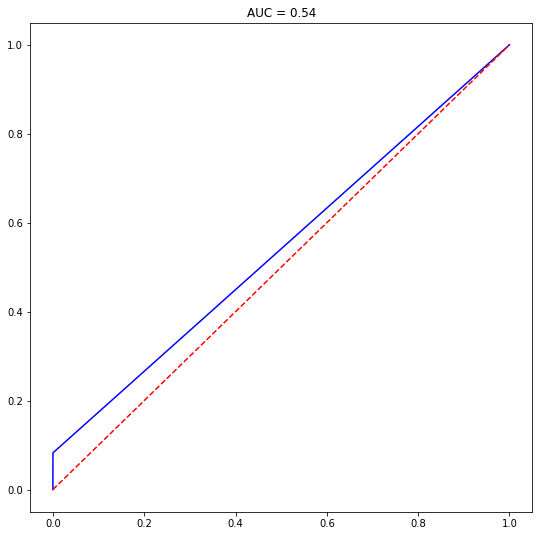

In [51]:
#Roc y AUC con los datos de test

false_positive_rate_rf, recall_rf, thresholds_rf = roc_curve(y_test, y_test_pred_rf)
roc_auc_rf = auc(false_positive_rate_rf, recall_rf)

print ('AUC: ', auc(false_positive_rate_rf, recall_rf))

plt.plot(false_positive_rate_rf, recall_rf, 'b')
plt.plot([0,1],[0,1],'r--')
plt.title('AUC = %0.2f' % roc_auc_rf)

## Máquinas vectores de soporte

In [52]:
from sklearn.svm import SVC

# Clasificador support vector machine:

# crear el clasificador
svm_classifier = SVC()

# ajustar el modelo 
svm_classifier.fit(x_train_transformed, y_train)

# predecir los valores
y_train_pred_svm = svm_classifier.predict(x_train_transformed)
y_test_pred_svm = svm_classifier.predict(x_test_transformed)

In [199]:
# comprobar si hay sobreajuste

# conjunto de entrenamiento

accuray_score_train_svm = accuracy_score(y_train, y_train_pred_svm)
precision_score_train_svm = precision_score(y_train, y_train_pred_svm)
recall_score_train_svm = recall_score(y_train, y_train_pred_svm)
print ("Resultados conjunto de entrenamiento: ")
print('Accuracy: ', accuray_score_train_svm)
print('Precision: ', precision_score_train_svm)
print('Recall: ', recall_score_train_svm)
print(classification_report(y_train,y_train_pred_svm))


# conjunto de test
accuray_score_test_svm = accuracy_score(y_test, y_test_pred_svm)
precision_score_test_svm = precision_score(y_test, y_test_pred_svm)
recall_score_test_svm = recall_score(y_test, y_test_pred_svm)
print ("\nResultados conjunto de test: ")
print('Accuracy: ', accuray_score_test_svm)
print('Precision: ', precision_score_test_svm)
print('Recall: ', recall_score_test_svm)
print(classification_report(y_test,y_test_pred_svm))



Resultados conjunto de entrenamiento: 
Accuracy:  0.912776701309377
Precision:  0.0
Recall:  0.0
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     31091
           1       0.00      0.00      0.00      2971

    accuracy                           0.91     34062
   macro avg       0.46      0.50      0.48     34062
weighted avg       0.83      0.91      0.87     34062


Resultados conjunto de entrenamiento: 
Accuracy:  0.9136183038772434
Precision:  0.0
Recall:  0.0
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13337
           1       0.00      0.00      0.00      1261

    accuracy                           0.91     14598
   macro avg       0.46      0.50      0.48     14598
weighted avg       0.83      0.91      0.87     14598



C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: P

AUC:  0.5


Text(0.5, 1.0, 'AUC = 0.50')

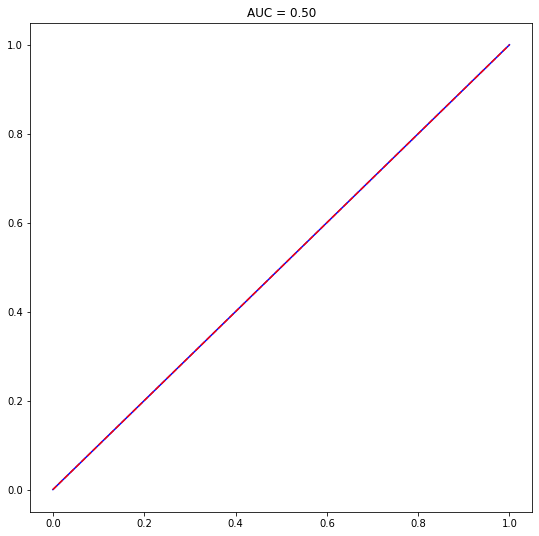

In [54]:
#Roc y AUC con los datos de test

false_positive_rate_svm, recall_svm, thresholds_svm = roc_curve(y_test, y_test_pred_svm)
roc_auc_svm = auc(false_positive_rate_svm, recall_svm)

print ('AUC: ', auc(false_positive_rate_svm, recall_svm))

plt.plot(false_positive_rate_svm, recall_svm, 'b')
plt.plot([0,1],[0,1],'r--')
plt.title('AUC = %0.2f' % roc_auc_svm)